# Electrical Load Consumtion forcastiong

 - #### [Datasets](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather)

## Importing Libraries

In [1]:
# Importing required libraries
import os
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For better visualization
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
#od.download('https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather')
os.listdir('data')

['energy_dataset.csv', 'weather_features.csv']

In [3]:
energy_df = pd.read_csv("data/energy_dataset.csv")
weather_df = pd.read_csv("data/weather_features.csv")

## Energy Dataset processing

In [4]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [5]:
energy_df = energy_df.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 
                            'generation hydro pumped storage aggregated', 'generation marine', 
                            'generation wind offshore', 'forecast wind offshore eday ahead',
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'], 
                            axis=1)

In [6]:
energy_df['time'] = pd.to_datetime(energy_df['time'], utc=True, infer_datetime_format=True)
energy_df = energy_df.set_index('time')

In [7]:
# Find NaNs and duplicates in df_energy

print('There are {} missing values or NaNs in df_energy.'
      .format(energy_df.isnull().values.sum()))

temp_energy = energy_df.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_energy based on all columns.'
      .format(temp_energy))

There are 292 missing values or NaNs in df_energy.
There are 0 duplicate rows in df_energy based on all columns.


In [8]:
# Display the number of non-zero values in each column

print('Non-zero values in each column:\n', energy_df.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

generation biomass                             35060
generation fossil brown coal/lignite           24547
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation hydro pumped storage consumption    22457
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                               35061
generation waste                               35061
generation wind onshore                        35061
total load actual                              35064
price day ahead                                35064
price actual                                   35064
dtype: int64


In [9]:
# Fill null values using interpolation

energy_df.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [10]:
# Find NaNs and duplicates in df_energy

print('There are {} missing values or NaNs in df_energy.'
      .format(energy_df.isnull().values.sum()))

temp_energy = energy_df.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_energy based on all columns.'
      .format(temp_energy))

There are 0 missing values or NaNs in df_energy.
There are 0 duplicate rows in df_energy based on all columns.


## Processing Weather dataset

In [11]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

We have to change the type of some of the columns, so that all of them are float64. We also have to parse 'dt_iso' correctly and actually rename it as 'time' so that it matches with the index of `energy_df`.

In [12]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [13]:
# Convert columns with int64 type values to float64 type

weather_df = df_convert_dtypes(weather_df, np.int64, np.float64)

In [14]:
# Convert dt_iso to datetime type, rename it and set it as index

weather_df ['time'] = pd.to_datetime(weather_df ['dt_iso'], utc=True, infer_datetime_format=True)
weather_df  = weather_df .drop(['dt_iso'], axis=1)
weather_df = weather_df .set_index('time')

In [15]:
# Display average weather features grouped by each city
cities = weather_df['city_name'].unique()
mean_weather_by_city =weather_df.groupby('city_name').mean()
mean_weather_by_city

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
city_name,,,,,,,,,,,,
Barcelona,289.848248,288.594704,291.021987,1284.010486,73.994221,2.786588,187.188043,0.117079,0.000327,0.000000,23.229648,760.917465
Bilbao,286.378489,284.916661,288.036687,1017.567439,79.089455,1.957470,159.883536,0.123493,0.001034,0.023455,43.960697,723.943228
Madrid,288.061071,286.824877,289.155600,1011.838448,59.776932,2.441696,173.293159,0.055083,0.000129,0.000029,22.397028,762.260264
Seville,293.105431,291.184103,295.962431,1018.504711,64.140732,2.483787,151.757179,0.045392,0.000180,0.000000,14.748770,771.409849
Valencia,290.780780,290.222277,291.355025,1015.973794,65.145113,2.692815,160.753820,0.035924,0.000226,0.000154,20.820999,781.228283


In [16]:
# Find NaNs and duplicates in df_weather

print('There are {} missing values or NaNs in df_weather.'
      .format(weather_df.isnull().values.sum()))

temp_weather =weather_df.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_weather based on all columns.'
      .format(temp_weather))

There are 0 missing values or NaNs in df_weather.
There are 8622 duplicate rows in df_weather based on all columns.


In [17]:
# Create df_weather_2 and drop duplicate rows in df_weather

df_weather_2 = weather_df.reset_index().drop_duplicates(subset=['time', 'city_name'], 
                                                        keep='last').set_index('time')

df_weather = weather_df.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time')

In [18]:
# Display the number of rows in each dataframe again

print('There are {} observations in df_energy.'.format(energy_df.shape[0]))

grouped_weather = df_weather.groupby('city_name')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))

There are 35064 observations in df_energy.
There are 35064 observations in df_weather about city: Valencia.
There are 35064 observations in df_weather about city: Madrid.
There are 35064 observations in df_weather about city: Bilbao.
There are 35064 observations in df_weather about city:  Barcelona.
There are 35064 observations in df_weather about city: Seville.


In [19]:
# Drop columns with qualitative weather information
df_weather = df_weather.drop(['weather_main', 'weather_id', 
                              'weather_description', 'weather_icon'], axis=1)

In [20]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city_name   175320 non-null  object 
 1   temp        175320 non-null  float64
 2   temp_min    175320 non-null  float64
 3   temp_max    175320 non-null  float64
 4   pressure    175320 non-null  float64
 5   humidity    175320 non-null  float64
 6   wind_speed  175320 non-null  float64
 7   wind_deg    175320 non-null  float64
 8   rain_1h     175320 non-null  float64
 9   rain_3h     175320 non-null  float64
 10  snow_3h     175320 non-null  float64
 11  clouds_all  175320 non-null  float64
dtypes: float64(11), object(1)
memory usage: 17.4+ MB


## Merging two datasets

In [21]:
# Split the df_weather into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in df_weather.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [22]:
# Merge all dataframes into the final dataframe

df_final = energy_df

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    df_final = df_final.merge(df, on=['time'], how='outer')
    df_final = df_final.drop('city_name_{}'.format(city_str), axis=1)
    
merged_df = df_final.copy()

In [23]:
# Display the number of NaNs and duplicates in the final dataframe

print('There are {} missing values or NaNs in df_final.'
      .format(df_final.isnull().values.sum()))

temp_final = df_final.duplicated(keep='first').sum()

print('\nThere are {} duplicate rows in df_energy based on all columns.'
      .format(temp_final))

There are 0 missing values or NaNs in df_final.

There are 0 duplicate rows in df_energy based on all columns.


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 72 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

## Visualization and Time series analysis

In [25]:
columns = ['total load actual','price day ahead', 'price actual', 'temp_Barcelona',
       'temp_min_Barcelona', 'temp_max_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona',
       'clouds_all_Barcelona', 'temp_Bilbao', 'temp_min_Bilbao',
       'temp_max_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
        'clouds_all_Bilbao', 'temp_Madrid',
       'temp_min_Madrid', 'temp_max_Madrid', 'pressure_Madrid',
       'humidity_Madrid', 'wind_speed_Madrid', 'wind_deg_Madrid',
       'rain_1h_Madrid',
       'clouds_all_Madrid', 'temp_Seville', 'temp_min_Seville',
       'temp_max_Seville', 'pressure_Seville', 'humidity_Seville',
       'wind_speed_Seville', 'wind_deg_Seville', 'rain_1h_Seville',
       'clouds_all_Seville',
       'temp_Valencia', 'temp_min_Valencia', 'temp_max_Valencia',
       'pressure_Valencia', 'humidity_Valencia', 'wind_speed_Valencia',
       'wind_deg_Valencia', 'rain_1h_Valencia', 
       'clouds_all_Valencia']
len(columns)

48

In [26]:
merged_df = merged_df[columns].copy()

In [27]:
# Find the correlations between the electricity load consumption and the rest of the features

correlations = merged_df.corr(method='pearson')
print(correlations['total load actual'].sort_values(ascending=False).to_string())

total load actual       1.000000
price day ahead         0.474273
price actual            0.435253
temp_min_Valencia       0.235297
temp_Valencia           0.220790
temp_min_Seville        0.206488
temp_max_Madrid         0.204718
temp_Seville            0.204571
temp_max_Valencia       0.199833
temp_Bilbao             0.196535
temp_max_Bilbao         0.194181
temp_min_Bilbao         0.193706
temp_min_Barcelona      0.187417
temp_Madrid             0.185388
temp_max_Seville        0.176234
temp_Barcelona          0.167338
wind_speed_Bilbao       0.155898
temp_min_Madrid         0.153753
wind_speed_Valencia     0.147982
temp_max_Barcelona      0.146444
wind_speed_Seville      0.132973
wind_speed_Barcelona    0.120719
wind_speed_Madrid       0.083669
wind_deg_Bilbao         0.050107
rain_1h_Madrid          0.047272
clouds_all_Valencia     0.040361
rain_1h_Valencia        0.029616
rain_1h_Bilbao          0.028971
clouds_all_Madrid       0.022172
pressure_Valencia       0.010565
pressure_M

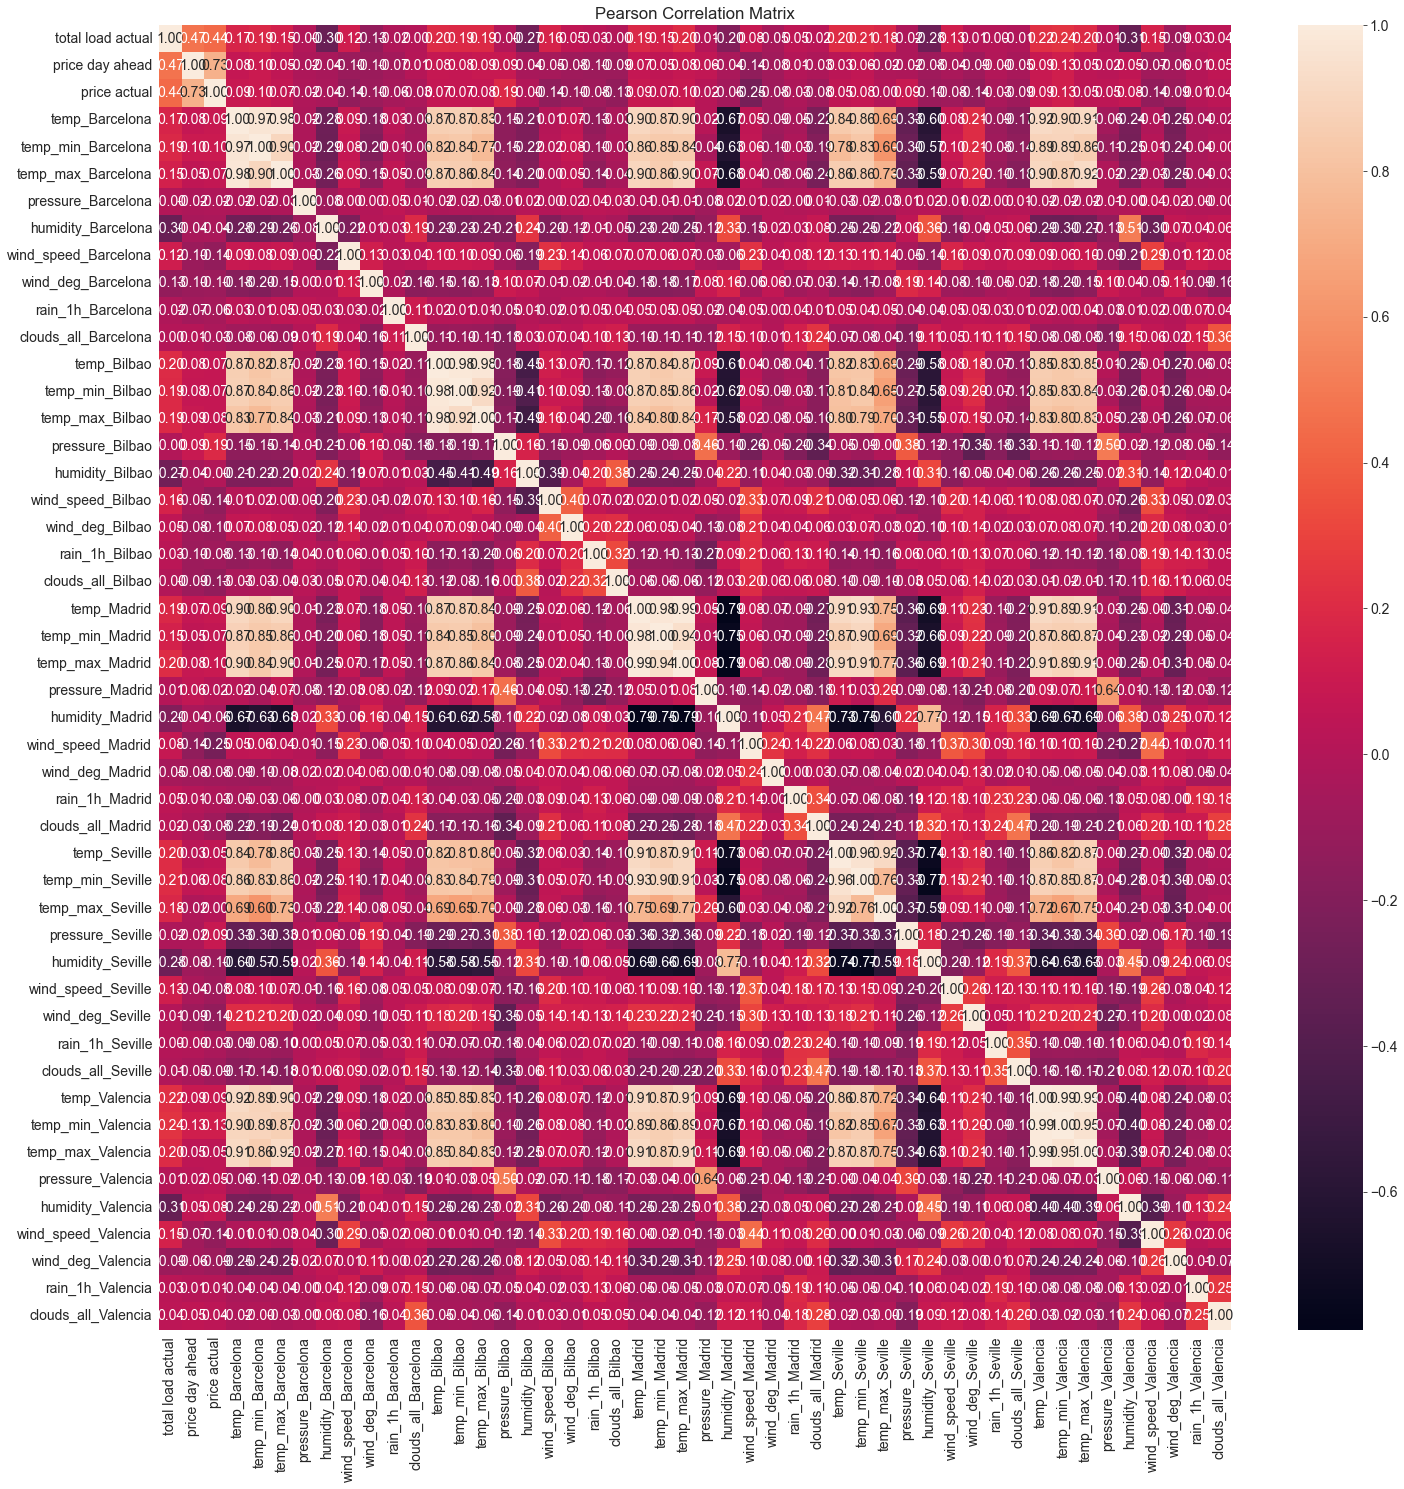

In [28]:
# Plot Pearson correlation matrix

correlations = merged_df.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [29]:
merged_df.describe()

,total load actual,price day ahead,price actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,...,clouds_all_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,clouds_all_Valencia
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,3.506400e+04,35064.000000,35064.000000,35064.000000,...,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,28698.281385,49.874341,57.884023,289.867178,288.615102,291.039356,1.287211e+03,73.830710,2.782740,187.664243,...,14.165070,290.783954,290.225644,291.357900,1015.979381,65.093971,2.692477,160.801648,0.034458,20.740475
std,4575.828854,14.618900,14.204083,6.723623,6.458640,7.288287,1.346303e+04,17.720809,1.996081,108.564505,...,26.169696,7.234569,7.090499,7.523438,11.937650,19.678281,2.582959,120.412607,0.263594,25.604016
min,18041.000000,2.060000,9.330000,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,268.830656,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,24807.000000,41.490000,49.347500,284.707375,284.150000,285.150000,1.014000e+03,62.000000,1.000000,100.000000,...,0.000000,285.150000,285.150000,285.650000,1012.000000,51.000000,1.000000,50.000000,0.000000,0.000000
50%,28902.000000,50.520000,58.020000,289.411250,288.150000,290.150000,1.017000e+03,76.000000,2.000000,210.000000,...,0.000000,290.190000,290.150000,291.150000,1017.000000,67.000000,2.000000,130.000000,0.000000,20.000000
75%,32194.250000,60.530000,68.010000,295.150000,293.274000,297.040000,1.021000e+03,87.000000,4.000000,280.000000,...,20.000000,296.150000,295.370000,297.150000,1021.000000,82.000000,4.000000,280.000000,0.000000,20.000000
max,41015.000000,101.990000,116.800000,309.150000,307.150000,315.370000,1.008371e+06,100.000000,15.000000,360.000000,...,100.000000,311.150000,311.150000,314.820000,1087.000000,100.000000,133.000000,360.000000,12.000000,100.000000


In [31]:
merged_df.head()

,total load actual,price day ahead,price actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,...,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,clouds_all_Valencia,hour,weekday,month
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,25385.0,50.10,65.41,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,...,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,23.0,2.0,12.0
2015-01-01 00:00:00+00:00,24382.0,48.10,64.92,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,...,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,3.0,1.0
2015-01-01 01:00:00+00:00,22734.0,47.33,64.48,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,...,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,1.0,3.0,1.0
2015-01-01 02:00:00+00:00,21286.0,42.27,59.32,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,...,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,2.0,3.0,1.0
2015-01-01 03:00:00+00:00,20264.0,38.41,56.04,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,...,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,3.0,3.0,1.0


In [42]:
def split_date(df):
    df['Date']= pd.to_datetime(df.index)
    df["Year"]= df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Day"] = df.Date.dt.day
    df["Hour"] = df.Date.dt.hour
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [40]:
split_date(merged_df)


In [44]:
merged_df.head()

,total load actual,price day ahead,price actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,...,rain_1h_Valencia,clouds_all_Valencia,hour,weekday,month,Date,Year,Month,Day,WeekOfYear
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,25385.0,50.10,65.41,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,...,0.0,0.0,23,2.0,12.0,2014-12-31 23:00:00+00:00,2014,12,31,1
2015-01-01 00:00:00+00:00,24382.0,48.10,64.92,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,...,0.0,0.0,0,3.0,1.0,2015-01-01 00:00:00+00:00,2015,1,1,1
2015-01-01 01:00:00+00:00,22734.0,47.33,64.48,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,...,0.0,0.0,1,3.0,1.0,2015-01-01 01:00:00+00:00,2015,1,1,1
2015-01-01 02:00:00+00:00,21286.0,42.27,59.32,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,...,0.0,0.0,2,3.0,1.0,2015-01-01 02:00:00+00:00,2015,1,1,1
2015-01-01 03:00:00+00:00,20264.0,38.41,56.04,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,...,0.0,0.0,3,3.0,1.0,2015-01-01 03:00:00+00:00,2015,1,1,1
